In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

C:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
meta = pd.read_csv("clean_data_name.csv")
meta.head()

C:\Users\anyat\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,name,provider,level,instructor,description,duration,price,link,category,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,Machine Learning,Coursera,All,Stanford University,Machine learning is the science of getting com...,11 weeks,Free Online Course (Audit),https://www.classcentral.com/course/machine-le...,NaN,NaN,NaN,NaN
1,2,Learning How to Learn: Powerful mental tools t...,Coursera,Beginner,"University of California, San Diego",This course gives you easy access to the inval...,4 weeks,Free Online Course (Audit),https://www.classcentral.com/course/learning-h...,NaN,NaN,NaN,NaN
2,3,Introduction to Engineering Mechanics,Coursera,All,Georgia Institute of Technology,This course is an introduction to learning and...,5 weeks,Free Online Course (Audit),https://www.classcentral.com/course/statics1-5...,NaN,NaN,NaN,NaN
3,4,Marketing in a Digital World,Coursera,Beginner,University of Illinois at Urbana-Champaign,"This course examines how digital tools, such a...",4 weeks,Free Online Course (Audit),https://www.classcentral.com/course/dmdigitalw...,NaN,NaN,NaN,NaN
4,5,Learning How To Learn for Youth,Coursera,Beginner,Arizona State University,Based on the most popular open online course i...,3 weeks,Free Online Course (Audit),https://www.classcentral.com/course/learning-h...,NaN,NaN,NaN,NaN


In [16]:
unlabeled = meta[meta.category.isnull()]
labeled = meta[meta.category.notnull()]

In [17]:
available_cat = list(dict.fromkeys(labeled["category"]))
available_cat

['Business',
 'Design',
 'Development',
 'Finance & Accounting',
 'Health & Fitness',
 'IT & Software',
 'Lifestyle',
 'Marketing',
 'Music',
 'Office',
 'Personal Development',
 'Photography & Video',
 'Productivity',
 'Teaching & Academics']

In [18]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [7]:
labeled['description'] = labeled['description'].map(lambda com : clean_text(com))
unlabeled['description'] = unlabeled['description'].map(lambda com : clean_text(com))

C:\Users\anyat\AppData\Local\Temp/ipykernel_6800/1600686307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled['description'] = labeled['description'].map(lambda com : clean_text(com))
C:\Users\anyat\AppData\Local\Temp/ipykernel_6800/1600686307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled['description'] = unlabeled['description'].map(lambda com : clean_text(com))


In [19]:
X_train =labeled.name
X_test = unlabeled.name

y_train = labeled.category

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [21]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [79]:
clf.predict((count_vect.transform(["This course begins with a look at the determinants of value. We will cover two main approaches to valuing businesses as going concerns, discounting cash flows and valuation ratios, including the inputs needed to perform the calculations and how each deal with risk."])))[0]

'Vodafone'

In [22]:
meta['clean_name'] = meta['name'].map(lambda com : clean_text(com))
meta['category'] = meta['category'].fillna("a")
print(meta)
for index,row in meta.iterrows():
    if row["category"] == "a":
        try:
            meta.loc[index,"category"] = clf.predict((count_vect.transform([row["clean_name"]])))[0]
            print(meta.loc[index,"category"])
        except:
            pass

        Unnamed: 0                                               name  \
0                1                                   Machine Learning   
1                2  Learning How to Learn: Powerful mental tools t...   
2                3              Introduction to Engineering Mechanics   
3                4                       Marketing in a Digital World   
4                5                    Learning How To Learn for Youth   
...            ...                                                ...   
204780      200739  Instagram Marketing for Startups and Entrepren...   
204781      200740     Hashtag Traffic Generation - Hashtag Marketing   
204782      200741  ASO from the Ground Up | Methods to Grow Your ...   
204783      200742  How to Prepare, Read and Analyse a Company Bal...   
204784      200743              Master Amazon EC2 Basics with 10 Labs   

        provider         level                                  instructor  \
0       Coursera           All               

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching &

Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching 

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Business
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching &

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productiv

Health & Fitness
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Aca

Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academi

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Photography & Video
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Productivity
Teaching & Academics
Teachi

Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Aca

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Produc

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching 

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
IT & Software
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teach

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivit

Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
IT & Software
Productivity
Productivity
Productivity
Productivity
Prod

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
P

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivit

Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics

Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
IT & Software
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Te

Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Finance & Accounting
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching 

Teaching & Academics
Productivity
Lifestyle
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Finance & Accounting
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Product

Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Lifestyle
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Productivity
Lifestyle
Teaching & Academics
Producti

Teaching & Academics
Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Photography & Video
Marketing
Design
Office
Photography & Video
Health & Fitness
Teaching & Academics
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Health & Fitness
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivit

Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Personal Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Product

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Development
Productivity
Teaching & Academics
Teaching & Academics
Tea

Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity


Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Ac

Teaching & Academics
Photography & Video
Productivity
Photography & Video
Teaching & Academics
Productivity
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Photography & Video
Photography & Video
Photography & Video
Teaching & Academics
Photography & Video
Productivity
Productivity
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Produ

Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Health & Fitness
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching 

Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
IT & Software
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Teaching & Academics
Photography & Video
Photography & Video
Photography & Video
Productivity
Photography & Video
Teaching & Academics
Productivity
Photography & Video
Teaching & Academics
Teaching & Academics
Productivity
Photograp

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Health & Fitness
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Health & Fitness
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Lifestyle
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teac

Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Office
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Photography & Video
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academ

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Personal Development
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Health & Fitness
Teaching & Acad

Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academ

Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Health & Fitness
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academ

Teaching & Academics
Productivity
Teaching & Academics
Personal Development
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Development
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Finance & Accounting
Productivity
Business
Design
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & 

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teach

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Personal Development
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Personal Development
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Development
Productivity
Producti

Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Finance & Accounting
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teach

Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Lifestyle
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Lifestyle
Productivit

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Lifestyle
Productivity
Productivit

Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Marketing
Design
Business
Business
Health & Fitness
Health & Fitness
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics


Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Productivity
Teaching & Academics
Product

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching

Photography & Video
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Pro

Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Health & Fitness
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Aca

Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Business
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
IT & Software
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Photography & Video
Photography & Video
Photography & Video
Productivity
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Teaching & Academics
Photography & Video
Photography & Video
Productivity
Photography & Video
Teaching & Academics
Productivity
Photography & Video
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Photography & Video
Teaching & Academics
Productivity
Photography & Video
Photography & Video
Photograph

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Lifestyle
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Business
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academ

Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Office
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Photography & Video
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Business
Productivity
Teaching & Academics
Tea

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Business
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Health & Fitness
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Health & Fitness
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academic

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Business
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academic

Teaching & Academics
Teaching & Academics
Productivity
Health & Fitness
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Personal Development
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Aca

Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Finance & Accounting
Productivity
Business
Design
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academi

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teach

Teaching & Academics
Productivity
Productivity
Teaching & Academics
Business
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Personal Development
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Personal Development
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Teaching & Academics
Development
Productivity
Teaching & Academics
Productivity
Productivity
Tea

Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teach

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Lifestyle
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Lifestyle
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Development
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Lifestyle
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Teaching & Academics
Productivity

Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Lifestyle
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Te

Design
Office
Health & Fitness
Health & Fitness
Teaching & Academics
Teaching & Academics
Finance & Accounting
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Health & Fitness
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Aca

Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Business
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Personal Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teachin

Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Development
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Photography & Video
Marketing
Design
Office
Business
Teaching & Academics
Teaching & Ac

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Ac

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Produ

Productivity
Photography & Video
Photography & Video
Productivity
Photography & Video
Photography & Video
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Teaching & Academics
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Photography & Video
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teachi

Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Health & Fitness
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching 

Finance & Accounting
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Photography & Video
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Business
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
IT & Software
Teaching & Academics
Teaching & A

Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Health & Fitness
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Health & Fitness
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Lifestyle
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Business
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & A

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Office
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics


Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Personal Development
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Business
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Aca

Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Business
Finance & Accounting
Productivity
Design
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Business
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Aca

Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Health & Fitness
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teac

Personal Development
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Personal Development
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Personal Development
Teaching & Academics
Productivity
Teaching & Academics
Development
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Prod

Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Finance & Accounting
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teach

Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Lifestyle
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Teaching & Academics
Lifestyle
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Teaching & Academics
Productivity
Productivity
Productivity
Productivity
Health & Fitness
Teaching & Academics
Development
Productivity
Health & Fitness
Teaching & Academics
Teaching & Academics
Teaching & Academics
Productivity
Teaching & Academics
Productivity
Teaching & Academics
Productivi

In [25]:
meta = meta.loc[:, ~meta.columns.str.contains('clean_name')]
meta

,name,provider,level,instructor,description,duration,price,link,category
0,Machine Learning,Coursera,All,Stanford University,Machine learning is the science of getting com...,11 weeks,Free Online Course (Audit),https://www.classcentral.com/course/machine-le...,Teaching & Academics
1,Learning How to Learn: Powerful mental tools t...,Coursera,Beginner,"University of California, San Diego",This course gives you easy access to the inval...,4 weeks,Free Online Course (Audit),https://www.classcentral.com/course/learning-h...,Productivity
2,Introduction to Engineering Mechanics,Coursera,All,Georgia Institute of Technology,This course is an introduction to learning and...,5 weeks,Free Online Course (Audit),https://www.classcentral.com/course/statics1-5...,Teaching & Academics
3,Marketing in a Digital World,Coursera,Beginner,University of Illinois at Urbana-Champaign,"This course examines how digital tools, such a...",4 weeks,Free Online Course (Audit),https://www.classcentral.com/course/dmdigitalw...,Teaching & Academics
4,Learning How To Learn for Youth,Coursera,Beginner,Arizona State University,Based on the most popular open online course i...,3 weeks,Free Online Course (Audit),https://www.classcentral.com/course/learning-h...,Productivity
...,...,...,...,...,...,...,...,...,...
204780,Instagram Marketing for Startups and Entrepren...,Udemy,intermediate,John Chang,Your Road Map to Instagram Success as a Lean S...,1-3 Hours,Free,https://www.udemy.com/course/instagram-for-sta...,Photography & Video
204781,Hashtag Traffic Generation - Hashtag Marketing,Udemy,intermediate,Infinite Income Academy,Understand exactly how to use hashtags in mark...,1-3 Hours,Free,https://www.udemy.com/course/hashtag-traffic-g...,Photography & Video
204782,ASO from the Ground Up | Methods to Grow Your ...,Udemy,intermediate,Yodo1 Games,Learn the secrets top mobile gaming studios an...,1-3 Hours,Free,https://www.udemy.com/course/aso-from-the-grou...,Photography & Video
204783,"How to Prepare, Read and Analyse a Company Bal...",Udemy,intermediate,The Duomo Initiative,A practical first step in company analysis,1-3 Hours,Free,https://www.udemy.com/course/balance-sheet/,Photography & Video


In [26]:
meta.to_csv("labeled_raw_name.csv")

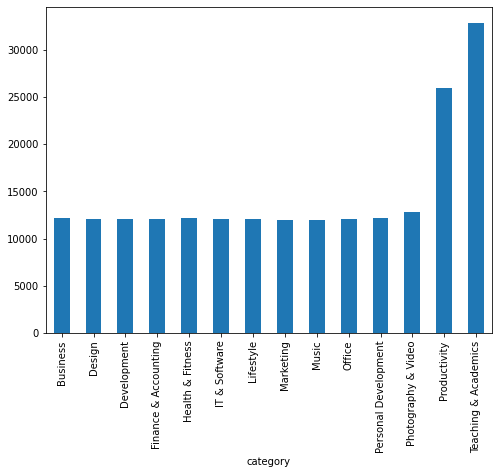

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
meta.groupby('category').description.count().plot.bar(ylim=0)
plt.show()